# Synthetic Aperture Radar Data Tutorial
***

**Tutorial :** This tutorial script contains samples for using RADARSAT missions images in python and QGIS to help users to make use of CSA data based on their needs.
**Mission and Instrument :** Synthetic Aperture Radar (SAR) , Example based on British Columbia wild fires taken by RCM3 - OK2080033    
**System Requirements :** Access to Internet   
**Tutorial Level :** Basic 

In [1]:
# Import the necessary libraries
import os
from osgeo import gdal
from osgeo import osr
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep
from mpl_toolkits.basemap import Basemap
import numpy as np
import cartopy.crs as ccrs

In [2]:
#Using gdal to get more information on the raster file.  

# Choose a raster file (.tif).  In this example the file was taken from the following link:
#https://donnees-data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/BC%20fires/

inras = r'C:\Users\rsheikholmolouki\Desktop\RCM test data\RCM test data\preview\productOverview.tif'

#Opens the raster file.
rds = gdal.Open (inras)

# Counts the number of bands.
Count = rds.RasterCount      
print ('The number of Raster bands are:\n', Count)
                 
#Get the 6 parameters of a raster data for this particular file
gt = rds.GetGeoTransform()
print ('Raster GeoTransform:\n', gt)  
                 
#Projects the raster data
proj = rds.GetProjection()
print ('Raster Projection:\n', proj)

The number of Raster bands are:
 1
Raster GeoTransform:
 (-121.43075142762187, 0.000573286006443096, 0.00012138070002250502, 50.738016633113126, 7.578211955308449e-05, -0.00036416963132971243)
Raster Projection:
 GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


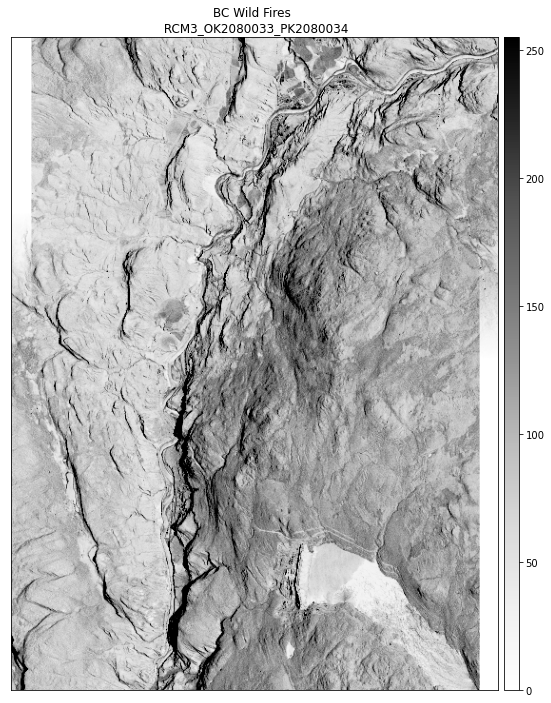

the minimum Raster value is:  0
the maximum Raster value is:  255


In [3]:
# Part 1 - Uploading and plotting a Raster file 

#Start by opening the file with rasterio. 
# Be aware that this will create a numpy array.  
with rio.open (inras) as BCWF: #BCWF = BC Wild Fires ==> Title of the dataset. 
   raster_layer = BCWF.read(1) 

#Plot the raster file and choose the titles
ep.plot_bands(raster_layer, title="BC Wild Fires \n RCM3_OK2080033_PK2080034", cmap = "Greys")

#To ensure the plot is accurate check the maximum and minimum values: 
print("the minimum Raster value is: ",raster_layer.min())
print("the maximum Raster value is: ", raster_layer.max())


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

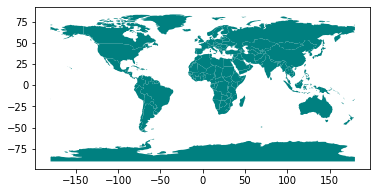

<Figure size 864x864 with 0 Axes>

In [4]:
#Part 2 - Uploading and plotting a Vector file: 

#Choose a shape file (.shp). In this example the file was taken form the following link:
#http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/

invec = r'C:\Users\rsheikholmolouki\Desktop\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'

#Part 2.1 - Plotting the shapefile: 
Shapefile_layer = gpd.read_file(invec)
Shapefile_layer.plot(color='teal')
plt.figure(figsize=(12, 12))

#Part 2.2 - Checking if the CRS of the shapefile would match the raster file before moving to the next step.
Shapefile_layer.crs

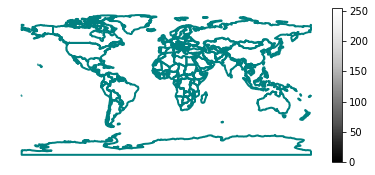

<Figure size 1080x1080 with 0 Axes>

In [5]:
#Part 3 - Ploting the Raster and the Vector data together
#There are two options to graph the raster and the vector file together. 

# OPTION 1 - Via ploading a raster and vector file. 

#Part 3.1 - Format Conversion
#Note: Part 1 was a nump array. To draw them correctly together the spatial metadata of the raster is needed.
 
with rio.open (inras) as raster :
    first_layer = raster.read (1, masked=True) # >> "Masked = True" hides all no data values.
    first_layer= plotting_extent(raster)

#Base values of the raster to plot correctly
first_layer

#Part 3.2 - Final Plotting combining the raster and the vector file
fig, ax = plt.subplots()

ep.plot_bands(raster_layer, ax=ax, extent=first_layer)

Shapefile_layer.plot(color='None', edgecolor='teal', linewidth=2, ax=ax)
plt.figure(figsize=(15, 15))

# Turn off the outline or axis border on the plot
ax.axis('off')
plt.savefig(r'C:\Users\rsheikholmolouki\Desktop\RCM Raster_Vector.tif')
plt.show()

#By zooming into the picture, the raster file can be seen as a grey dot. 

Min Longitude: 
 -121.43075142762187
Min Latitude: 
 50.48819626602094
Max Longitude: 
 -121.05396183210756
Max Latitude: 
 50.77681707832431


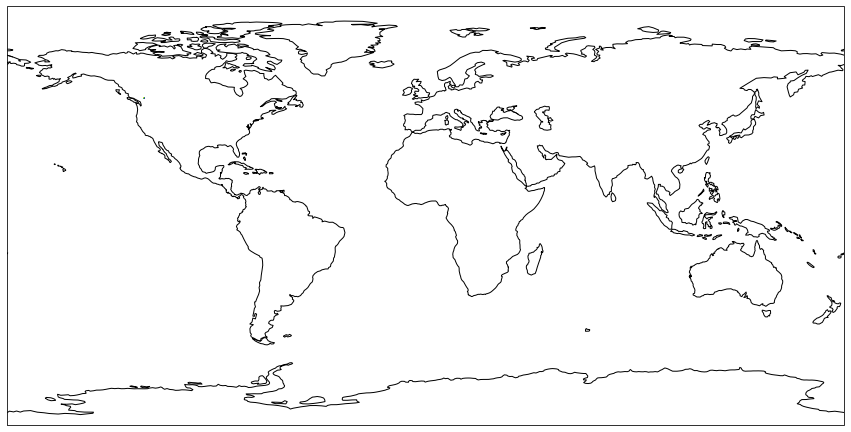

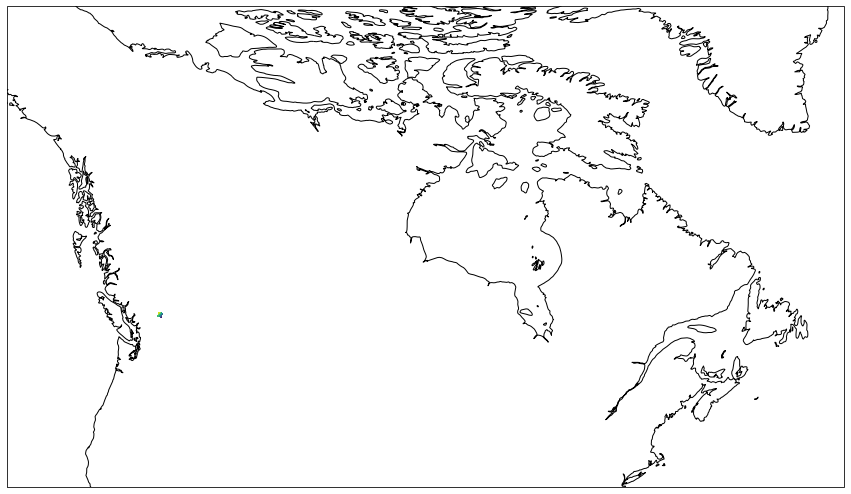

In [6]:
#OPTION 2 - Using Cartopy 
#*In this option no vector file is uploaded!*

#Part 4.1 - start by opening the raster file.   
layer1 = rio.open (inras)

#Part 4.2 - Calculate the bounds of the raster by printing the Boundingbox. 
layer1.bounds

# Part 4.3 - assign the values of the Boundingbox into latitude & Longitude in the format below. 
min_lon = layer1.bounds[0]
print ('Min Longitude: \n', layer1.bounds[0])

min_lat = layer1.bounds[1]
print ('Min Latitude: \n', layer1.bounds[1])

max_lon =layer1.bounds[2]
print ('Max Longitude: \n', layer1.bounds[2])

max_lat = layer1.bounds[3]
print ('Max Latitude: \n', layer1.bounds[3])

#Part 4.4 - Assign the values above into a new object with numpy linspace function. 

lon = np.linspace (min_lon, max_lon)
lat = np.linspace (min_lat, max_lat)

lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

data_crs = ccrs.PlateCarree()

# Part 4.5 - plot the graph via cartopy - World Map
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data, transform=data_crs)
plt.savefig(r'C:\Users\rsheikholmolouki\Desktop\RCM - World_Map.png')
plt.show()


#Part 4.6 - Plot a colored map via cartopy - Zoom in to Canada
#Add the coordinates of Canada
extent = [-130, -55, 36.5, 75]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
plt.figure(figsize=(15, 15))

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent) 


ax.coastlines()
ax.contourf(lon, lat, data, transform=data_crs)
plt.savefig(r'C:\Users\rsheikholmolouki\Desktop\RCM - Canada Map.png')
plt.show()
